Running the LSST source detection software and comparison to source detection with OSSOS pipeline.
---

OSSOS software outputs two source catalogs for each CCD in each image: JMP and Matt catalogs, generated using wavelet analysis and source extractor respectively. The OSSOS source catalog is generated by looking at the intersection of these two individual catalogs, and then searching for objects moving linearly between images. More details on the OSSOS/CFEPS moving object detection pipeline available in [Petit et al, 2004](http://mnras.oxfordjournals.org/content/347/2/471). 

To test the LSST source detection pipeline, and in particular to determine if we were likely to find new or different objects, we downloaded a sample of OSSOS data (field E+0+0 and E+0+1) and examined the results of LSST and OSSOS source catalogs in detail. 

---
Below we examine the JMP (blue circles) wavelet detections and Matt (small red circles) SExtractor source catalogs, identifying our "cross-matched" version of the intersection of these catalogs by larger yellow circles. These are just some samples, attempting to demonstrate the range of the number of detections.  We also provide the python code used to match the two catalogs together.

In [15]:
# Snippet from 'cross-matching' code
# jmp and matt are dictionaries containing the x/y/flux information for all sources from their respective catalogs.
# both is a dictionary to hold the sources from Matt which match each JMP source. 
tolerance = 1.5
for x, y, flux in zip(jmp['x'], jmp['y'], jmp['flux']):
    diffx = matt['x'] - x
    diffy = matt['y'] - y    
    match = np.where((abs(diffx) < tolerance ) & (abs(diffy) < tolerance))[0]
    if len(match) == 1:
        both['x'].append(x)
        both['y'].append(y)
        both['flux'].append(flux)
        both['jmpx'].append(x)
        both['jmpy'].append(y)
        both['jmpflux'].append(flux)
        both['mattx'].append(matt['x'][match][0])
        both['matty'].append(matt['y'][match][0])
        both['mattflux'].append(matt['flux'][match][0])
    if len(match) > 1:
        print 'Limits too wide maybe? finding more than 1 match', x, y, len(match)
        print '  JMP: x', x, 'y', y, 'flux', flux
        print '  MATT: x', matt['x'][match], 'y', matt['y'][match], 'flux', matt['flux'][match]

NameError: name 'jmp' is not defined

In [16]:
from IPython.display import Image

It's clear that the JMP/wavelet and Matt/SExtractor catalogs find quite different sources, and that the intersection of the catalogs is more reliable than either alone. The images below are generated by displaying the image in ds9, overlaying the JMP, Matt and cross-matched catalogs.

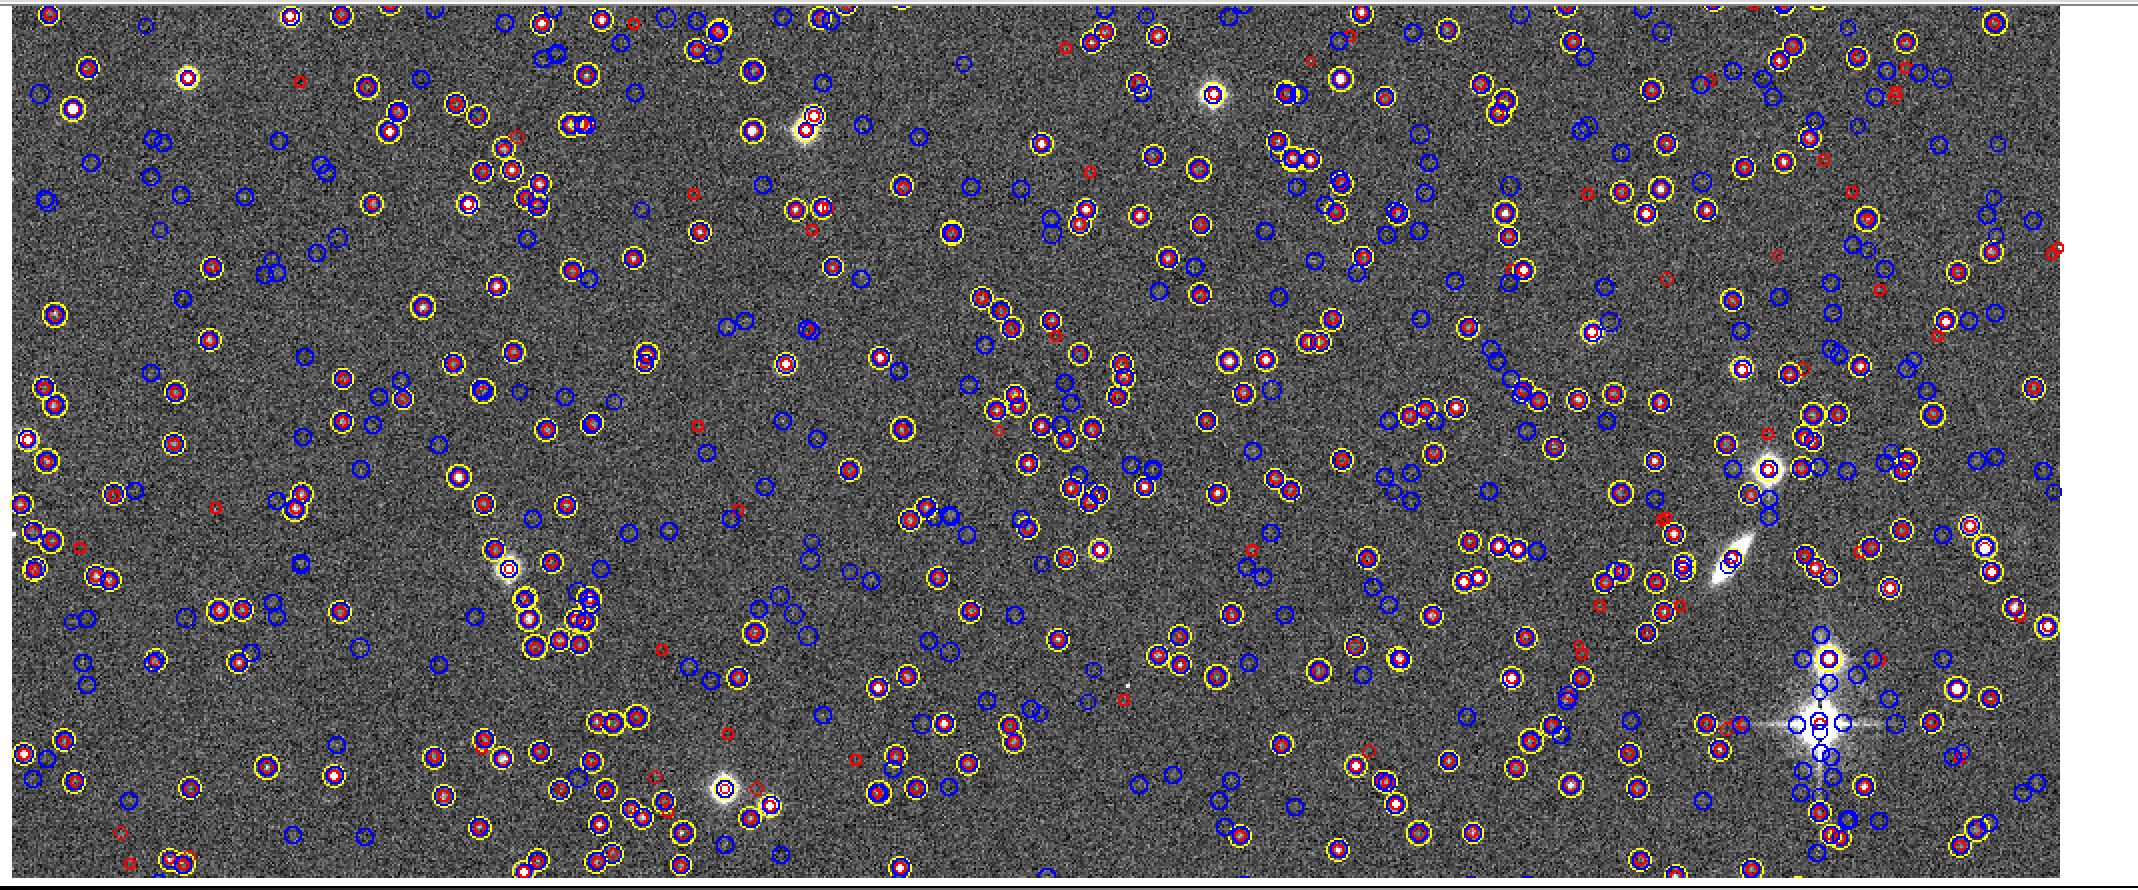

In [20]:
Image(filename='1616327_CCD15.png', width=1000)

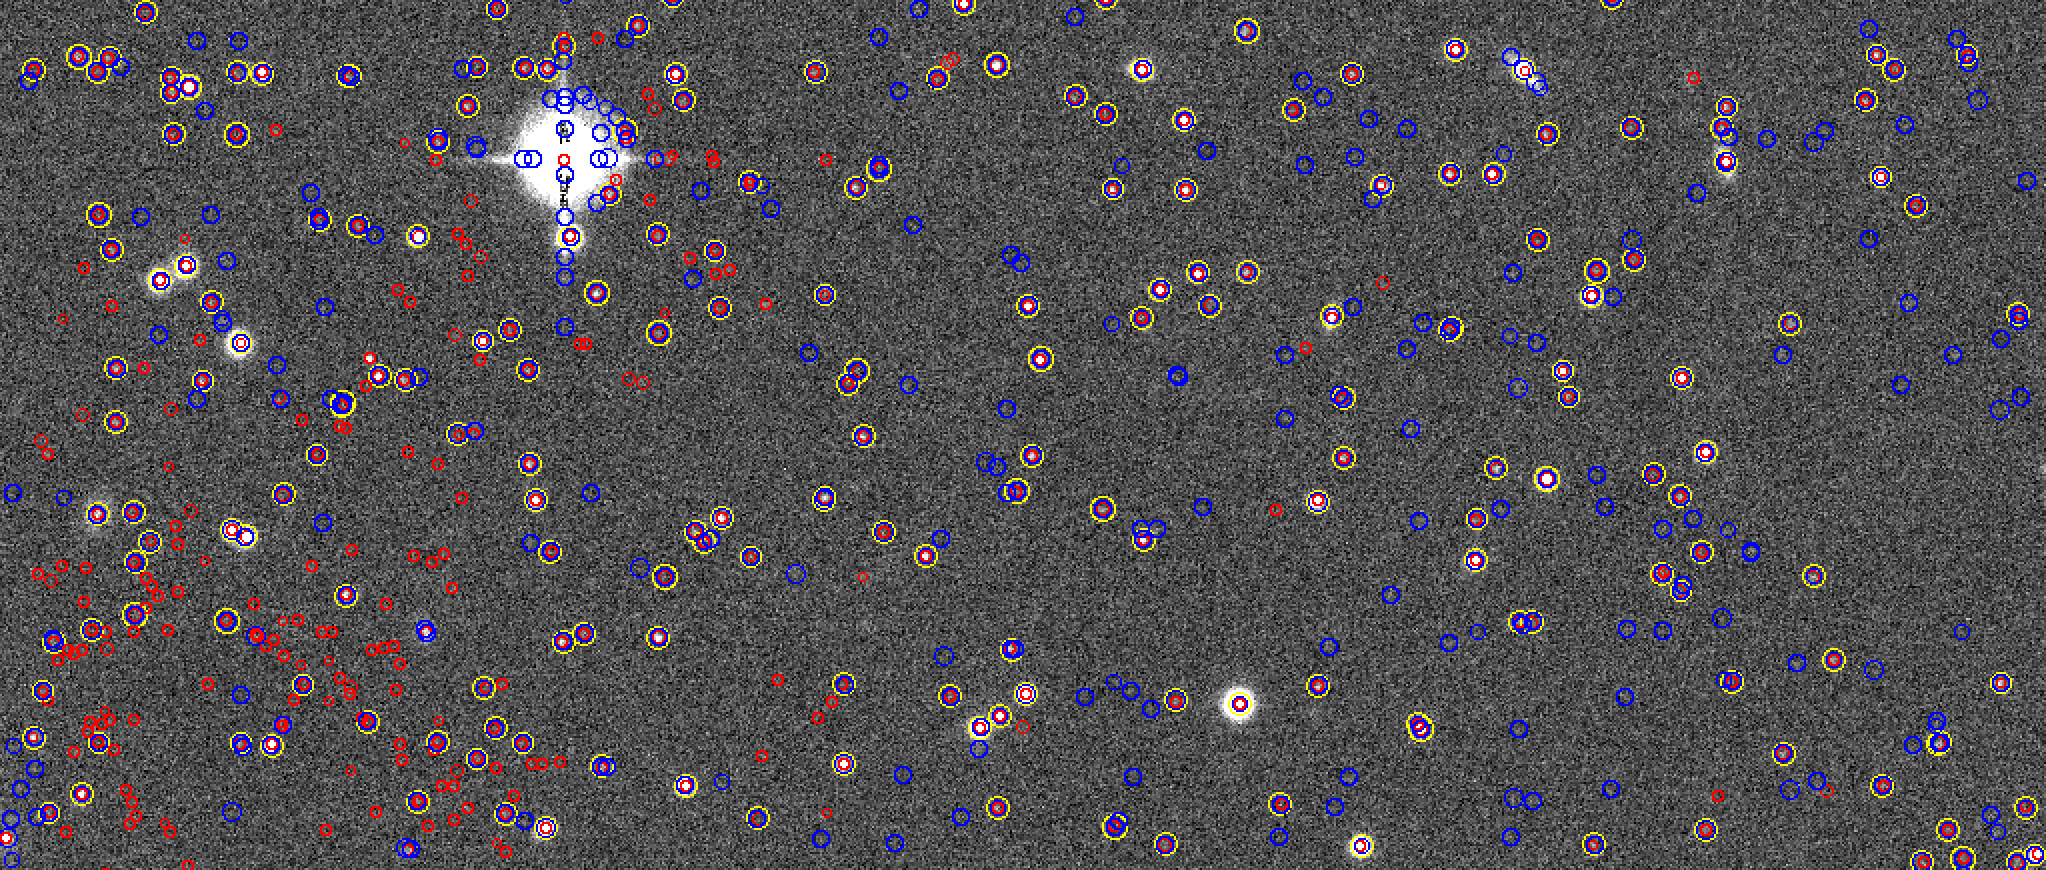

In [18]:
Image(filename='1612606_CCD21.png', width=1000)

We see that the JMP/wavelet catalogs find more sources along the diffraction spikes of bright stars. We also found that Matt/JMP behaved quite differently in some cases, finding large numbers of sources in some cases that may have been associated with bad background subtraction. Usually this occured with the Matt/Sextractor catalogs. Happily for OSSOS, we did not find any cases where both JMP and Matt failed at the same time.

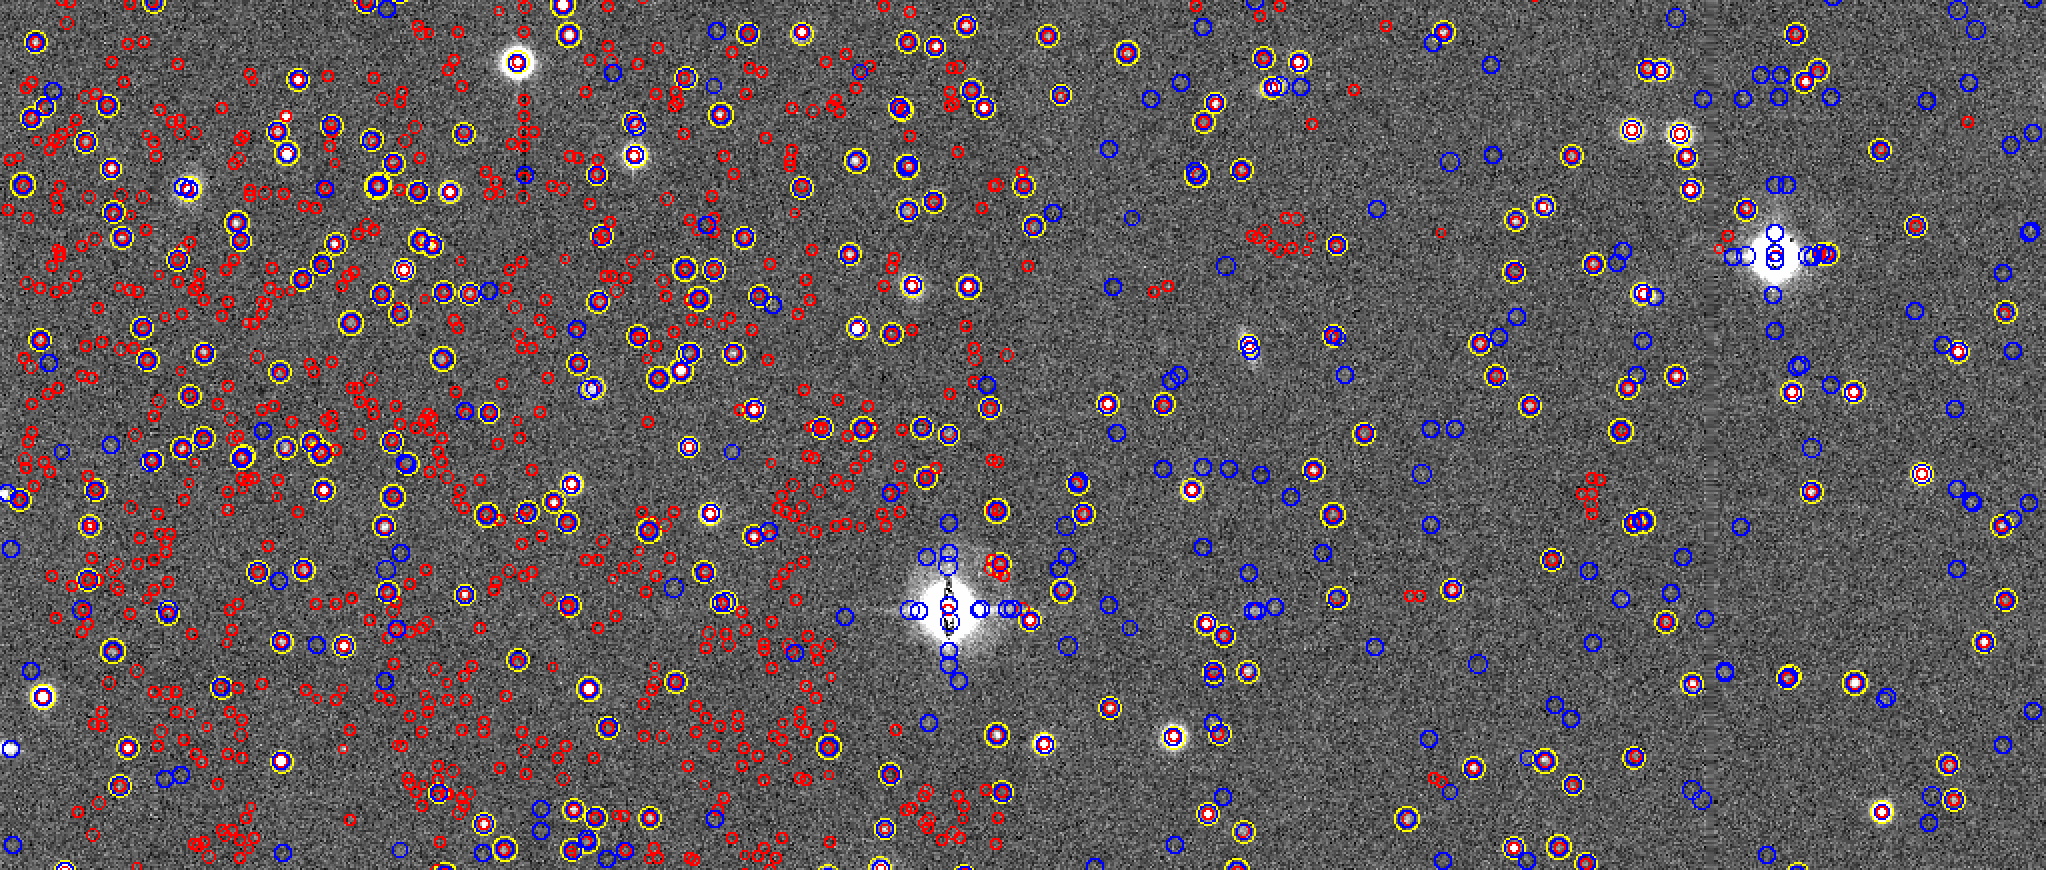

In [21]:
Image(filename='1609158_CCD08.png', width=1000)

An example of JMP having many sources?

---
We then looked at the sources detected by the LSST pipeline. The same examples (from above) are repeated below, now showing only the LSST sources (green circles) and cross-matched sources (yellow circles). The LSST detection pipeline, by itself, approximates the intersection of the JMP and Matt pipelines. 

example images, comments.

---
In order to compare the overall number of sources detected with LSST and the overall number of sources detected by OSSOS, we used sources detected in (A) LSST and JMP and (B) LSST and Matt in order to determine flux conversion ratios between each of these catalogs. 

.. description of flux conversion calculation ..

---
Then we looked at all sources detected in each of the E+0+0 / E+0+1 images from each of the OSSOS catalogs and the LSST catalogs. 
.. histogram description .. 

(... hmm, we could/should look at the cross-match between LSST and OSSOS (the intersection) and looked at sources found in one but not the other to see what brightness distribution of these objects is and how many there are! .. )
